In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tqdm import tqdm

tf.compat.v1.enable_v2_behavior()

In [160]:
A = np.array([
    [1,0,1,0,0,0,0,0],
    [0,1,0,1,0,0,0,0]
])

N = 1000

xs = np.random.randn(4, N)
xs = np.vstack([xs, xs])
ys = A @ xs

xs = xs.T
ys = ys.T

In [161]:
l1coeff = 1e-2
def process_for_l1(l1coeff):  
    x = tf.keras.Input(shape=(8,))
    y = tf.keras.layers.Dense(2, kernel_regularizer=tf.keras.regularizers.l1(l1coeff))(x)
    model = tf.keras.Model(inputs=x, outputs=y)
    model.compile('adam', 'mse')
    history = model.fit(xs, ys, epochs=100, verbose=0)
    plt.plot(history.history['loss'])
    w = model.weights[0].numpy().T
    nnz = np.sum(np.abs(w) > 1e-1) # should be just 4
    loss = model.evaluate(xs, ys)
    return nnz, loss

In [104]:
l1s = np.logspace(-5, 1, 50)

  0%|          | 0/50 [00:00<?, ?it/s]

1000/1000 [==============================] - 0s 43us/sample - loss: 5.7846e-05


  2%|▏         | 1/50 [00:02<02:16,  2.78s/it]

1000/1000 [==============================] - 0s 44us/sample - loss: 7.7176e-05


  4%|▍         | 2/50 [00:05<02:13,  2.78s/it]

1000/1000 [==============================] - 0s 43us/sample - loss: 9.0525e-05


  6%|▌         | 3/50 [00:08<02:10,  2.78s/it]

1000/1000 [==============================] - 0s 44us/sample - loss: 1.2808e-04


  8%|▊         | 4/50 [00:11<02:07,  2.78s/it]

1000/1000 [==============================] - 0s 45us/sample - loss: 2.1352e-04


 10%|█         | 5/50 [00:14<02:06,  2.82s/it]

1000/1000 [==============================] - 0s 42us/sample - loss: 2.6777e-04


 12%|█▏        | 6/50 [00:16<02:03,  2.81s/it]

1000/1000 [==============================] - 0s 45us/sample - loss: 3.3925e-04


 14%|█▍        | 7/50 [00:19<02:00,  2.80s/it]

1000/1000 [==============================] - 0s 42us/sample - loss: 3.5819e-04


 16%|█▌        | 8/50 [00:22<01:57,  2.80s/it]

1000/1000 [==============================] - 0s 44us/sample - loss: 5.8451e-04


 18%|█▊        | 9/50 [00:25<01:54,  2.79s/it]

1000/1000 [==============================] - 0s 43us/sample - loss: 6.1531e-04


 20%|██        | 10/50 [00:27<01:51,  2.80s/it]

1000/1000 [==============================] - 0s 42us/sample - loss: 0.0010


 22%|██▏       | 11/50 [00:30<01:49,  2.80s/it]

1000/1000 [==============================] - 0s 44us/sample - loss: 0.0012


 24%|██▍       | 12/50 [00:33<01:46,  2.79s/it]

1000/1000 [==============================] - 0s 43us/sample - loss: 0.0019


 26%|██▌       | 13/50 [00:36<01:43,  2.79s/it]

1000/1000 [==============================] - 0s 42us/sample - loss: 0.0023


 28%|██▊       | 14/50 [00:39<01:40,  2.78s/it]

1000/1000 [==============================] - 0s 43us/sample - loss: 0.0030


 30%|███       | 15/50 [00:41<01:37,  2.79s/it]

1000/1000 [==============================] - 0s 43us/sample - loss: 0.0033


 32%|███▏      | 16/50 [00:44<01:35,  2.82s/it]

1000/1000 [==============================] - 0s 45us/sample - loss: 0.0055


 34%|███▍      | 17/50 [00:47<01:32,  2.81s/it]

1000/1000 [==============================] - 0s 45us/sample - loss: 0.0068


 36%|███▌      | 18/50 [00:50<01:29,  2.80s/it]

1000/1000 [==============================] - 0s 44us/sample - loss: 0.0107


 38%|███▊      | 19/50 [00:53<01:26,  2.81s/it]

1000/1000 [==============================] - 0s 43us/sample - loss: 0.0126


 40%|████      | 20/50 [00:55<01:23,  2.80s/it]

1000/1000 [==============================] - 0s 43us/sample - loss: 0.0157


 42%|████▏     | 21/50 [00:58<01:20,  2.79s/it]

1000/1000 [==============================] - 0s 43us/sample - loss: 0.0178


 44%|████▍     | 22/50 [01:01<01:18,  2.79s/it]

1000/1000 [==============================] - 0s 44us/sample - loss: 0.0273


 46%|████▌     | 23/50 [01:04<01:15,  2.78s/it]

1000/1000 [==============================] - 0s 44us/sample - loss: 0.0280


 48%|████▊     | 24/50 [01:07<01:12,  2.79s/it]

1000/1000 [==============================] - 0s 44us/sample - loss: 0.0411


 50%|█████     | 25/50 [01:09<01:09,  2.79s/it]

1000/1000 [==============================] - 0s 144us/sample - loss: 0.0623


 52%|█████▏    | 26/50 [01:12<01:07,  2.82s/it]

1000/1000 [==============================] - 0s 45us/sample - loss: 0.0688


 54%|█████▍    | 27/50 [01:15<01:04,  2.81s/it]

1000/1000 [==============================] - 0s 44us/sample - loss: 0.0880


 56%|█████▌    | 28/50 [01:18<01:01,  2.81s/it]

1000/1000 [==============================] - 0s 44us/sample - loss: 0.1059


 58%|█████▊    | 29/50 [01:21<00:58,  2.80s/it]

1000/1000 [==============================] - 0s 42us/sample - loss: 0.1397


 60%|██████    | 30/50 [01:23<00:56,  2.80s/it]

1000/1000 [==============================] - 0s 43us/sample - loss: 0.1841


 62%|██████▏   | 31/50 [01:26<00:53,  2.80s/it]

1000/1000 [==============================] - 0s 43us/sample - loss: 0.2421


 64%|██████▍   | 32/50 [01:29<00:50,  2.79s/it]

1000/1000 [==============================] - 0s 42us/sample - loss: 0.3175


 66%|██████▌   | 33/50 [01:32<00:47,  2.80s/it]

1000/1000 [==============================] - 0s 42us/sample - loss: 0.4149


 68%|██████▊   | 34/50 [01:35<00:44,  2.80s/it]

1000/1000 [==============================] - 0s 43us/sample - loss: 0.5394


 70%|███████   | 35/50 [01:37<00:41,  2.79s/it]

1000/1000 [==============================] - 0s 45us/sample - loss: 0.6965


 72%|███████▏  | 36/50 [01:40<00:39,  2.79s/it]

1000/1000 [==============================] - 0s 43us/sample - loss: 0.8905


 74%|███████▍  | 37/50 [01:43<00:36,  2.82s/it]

1000/1000 [==============================] - 0s 46us/sample - loss: 1.1228


 76%|███████▌  | 38/50 [01:46<00:33,  2.82s/it]

1000/1000 [==============================] - 0s 46us/sample - loss: 1.3871


 78%|███████▊  | 39/50 [01:49<00:30,  2.81s/it]

1000/1000 [==============================] - 0s 44us/sample - loss: 1.6609


 80%|████████  | 40/50 [01:52<00:28,  2.81s/it]

1000/1000 [==============================] - 0s 45us/sample - loss: 1.8886


 82%|████████▏ | 41/50 [01:54<00:25,  2.80s/it]

1000/1000 [==============================] - 0s 45us/sample - loss: 1.9661


 84%|████████▍ | 42/50 [01:57<00:22,  2.80s/it]

1000/1000 [==============================] - 0s 45us/sample - loss: 1.9674


 86%|████████▌ | 43/50 [02:00<00:19,  2.79s/it]

1000/1000 [==============================] - 0s 44us/sample - loss: 1.9685


 88%|████████▊ | 44/50 [02:03<00:16,  2.78s/it]

1000/1000 [==============================] - 0s 44us/sample - loss: 1.9698


 90%|█████████ | 45/50 [02:05<00:13,  2.78s/it]

1000/1000 [==============================] - 0s 44us/sample - loss: 1.9684


 92%|█████████▏| 46/50 [02:08<00:11,  2.77s/it]

1000/1000 [==============================] - 0s 45us/sample - loss: 1.9749


 94%|█████████▍| 47/50 [02:11<00:08,  2.77s/it]

1000/1000 [==============================] - 0s 43us/sample - loss: 1.9793


 96%|█████████▌| 48/50 [02:14<00:05,  2.78s/it]

1000/1000 [==============================] - 0s 43us/sample - loss: 1.9800


 98%|█████████▊| 49/50 [02:17<00:02,  2.82s/it]

1000/1000 [==============================] - 0s 44us/sample - loss: 1.9892


100%|██████████| 50/50 [02:19<00:00,  2.80s/it]


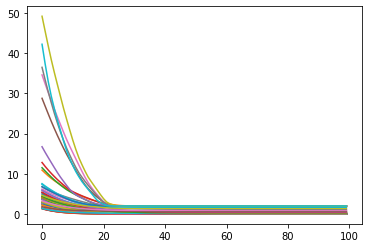

In [105]:
results = [process_for_l1(l1) for l1 in tqdm(l1s)]

In [106]:
results

[(13, 5.784553021658212e-05),
 (13, 7.717558945296332e-05),
 (15, 9.052539488766343e-05),
 (11, 0.00012807859550230204),
 (16, 0.0002135198210598901),
 (16, 0.00026776931644417344),
 (14, 0.00033924891310743987),
 (12, 0.0003581939188297838),
 (12, 0.0005845112316310405),
 (10, 0.0006153093529865146),
 (14, 0.001020804388448596),
 (10, 0.0011980372620746494),
 (11, 0.001861421413719654),
 (12, 0.002347689813002944),
 (13, 0.003021742122247815),
 (11, 0.003278737789019942),
 (12, 0.005519524101167917),
 (12, 0.006808482103049755),
 (16, 0.010715598434209824),
 (14, 0.01263935262709856),
 (11, 0.01572794817388058),
 (9, 0.017821964964270593),
 (13, 0.027257165640592575),
 (9, 0.028020599216222762),
 (8, 0.041114367365837096),
 (13, 0.06226451095938683),
 (11, 0.06877178978919983),
 (9, 0.0880099790096283),
 (7, 0.10585361284017562),
 (7, 0.13970498442649842),
 (5, 0.18410166728496552),
 (8, 0.24211079096794128),
 (7, 0.3175463860034943),
 (8, 0.4148947505950928),
 (6, 0.5394057855606079)

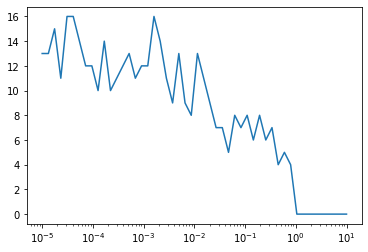

In [111]:
plt.plot(l1s, np.array(results)[:,0])
plt.xscale('log')
plt.show()

In [162]:
from tensorflow_model_optimization.python.core.sparsity.keras import pruning_schedule as pruning_sched
from tensorflow_model_optimization.python.core.sparsity.keras import pruning_wrapper
from tensorflow_model_optimization.python.core.sparsity.keras import prune
from tensorflow_model_optimization.python.core.sparsity.keras import pruning_callbacks

Need automatic l1 selection, otherwise it's too bad...

In [198]:
def train_pruned(sparsity, epochs=100):
    pruning_params = {
        'pruning_schedule': pruning_sched.ConstantSparsity(sparsity, 0),
        'block_size': (1, 1),
        'block_pooling_type': 'AVG'
    }

    x = tf.keras.Input(shape=(8,))
    y = prune.prune_low_magnitude(tf.keras.layers.Dense(2, kernel_regularizer=tf.keras.regularizers.l1(l1coeff)), **pruning_params)(x)
    model = tf.keras.Model(inputs=x, outputs=y)
    model.compile('adam', 'mse')
    history = model.fit(xs, ys, epochs=epochs, verbose=0, callbacks=[pruning_callbacks.UpdatePruningStep()])
    plt.plot(history.history['loss'])
    plt.show()
    w = model.weights[0].numpy().T
    nnz = np.sum(np.abs(w) > 1e-1) # should be just 4
    loss = model.evaluate(xs, ys)
    return nnz, loss

In [199]:
l = 0
r = 0.99

def good_loss(l):
    return l <= 1e-2

while r - l >= 1e-2:
    m = (r + l) / 2
    

KeyboardInterrupt: 

In [200]:
z = np.linspace(0, 0.99, 20)


  0%|          | 0/20 [00:23<?, ?it/s]


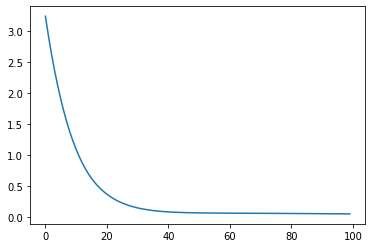

1000/1000 [==============================] - 0s 50us/sample - loss: 0.0524



  5%|▌         | 1/20 [00:04<01:23,  4.38s/it]

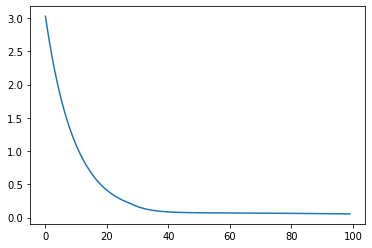

1000/1000 [==============================] - 0s 53us/sample - loss: 0.0550



 10%|█         | 2/20 [00:08<01:18,  4.38s/it]

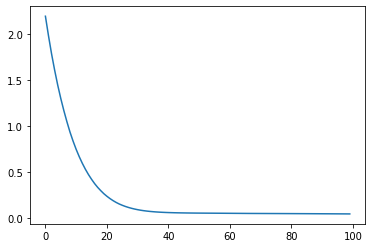

1000/1000 [==============================] - 0s 50us/sample - loss: 0.0454



 15%|█▌        | 3/20 [00:13<01:15,  4.42s/it]

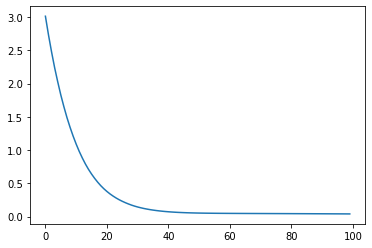

1000/1000 [==============================] - 0s 50us/sample - loss: 0.0398



 20%|██        | 4/20 [00:17<01:10,  4.42s/it]

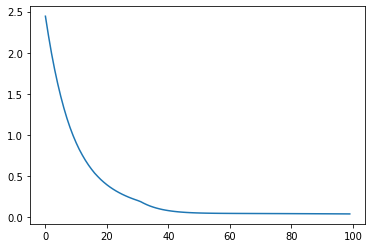

1000/1000 [==============================] - 0s 50us/sample - loss: 0.0416



 25%|██▌       | 5/20 [00:22<01:06,  4.42s/it]

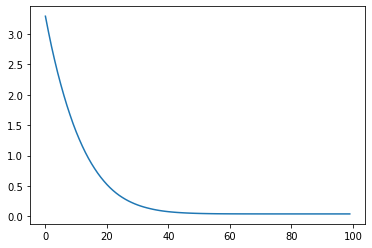

1000/1000 [==============================] - 0s 48us/sample - loss: 0.0398



 30%|███       | 6/20 [00:26<01:01,  4.40s/it]

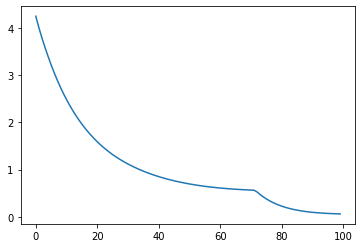

1000/1000 [==============================] - 0s 49us/sample - loss: 0.0580



 35%|███▌      | 7/20 [00:30<00:57,  4.39s/it]

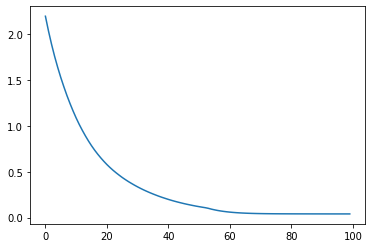

1000/1000 [==============================] - 0s 49us/sample - loss: 0.0398



 40%|████      | 8/20 [00:35<00:52,  4.39s/it]

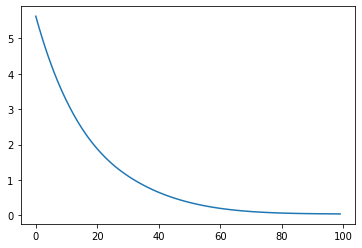

1000/1000 [==============================] - 0s 51us/sample - loss: 0.0421



 45%|████▌     | 9/20 [00:39<00:48,  4.37s/it]

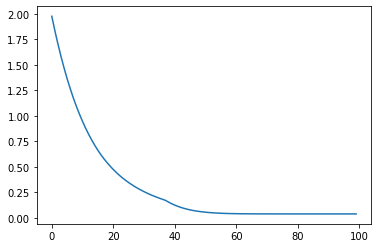

1000/1000 [==============================] - 0s 50us/sample - loss: 0.0398



 50%|█████     | 10/20 [00:43<00:43,  4.37s/it]

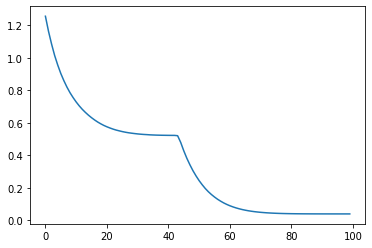

1000/1000 [==============================] - 0s 49us/sample - loss: 0.0398



 55%|█████▌    | 11/20 [00:48<00:39,  4.44s/it]

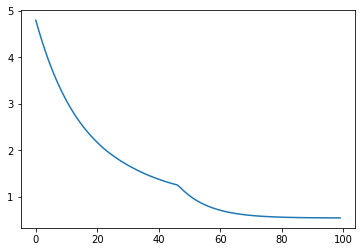

1000/1000 [==============================] - 0s 50us/sample - loss: 0.5505



 60%|██████    | 12/20 [00:52<00:35,  4.42s/it]

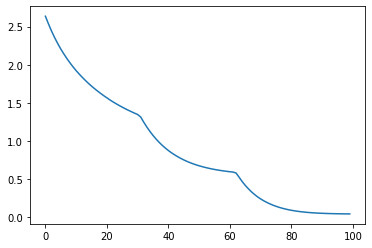

1000/1000 [==============================] - 0s 52us/sample - loss: 0.0415



 65%|██████▌   | 13/20 [00:57<00:30,  4.40s/it]

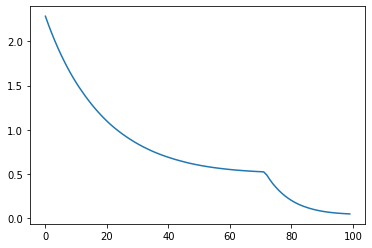

1000/1000 [==============================] - 0s 51us/sample - loss: 0.0483



 70%|███████   | 14/20 [01:01<00:26,  4.40s/it]

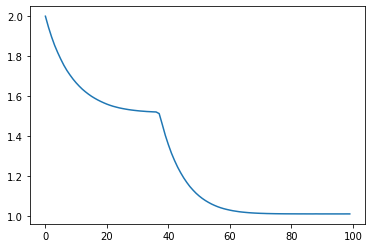

1000/1000 [==============================] - 0s 49us/sample - loss: 1.0095



 75%|███████▌  | 15/20 [01:06<00:21,  4.39s/it]

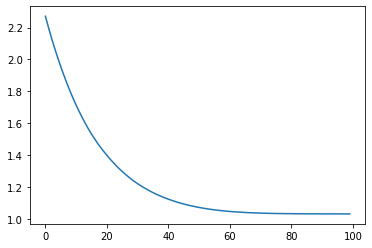

1000/1000 [==============================] - 0s 49us/sample - loss: 1.0322



 80%|████████  | 16/20 [01:10<00:17,  4.39s/it]

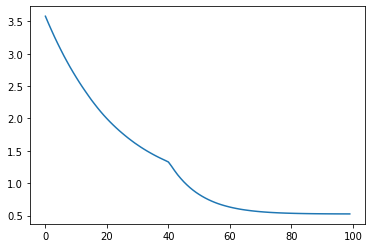

1000/1000 [==============================] - 0s 50us/sample - loss: 0.5244



 85%|████████▌ | 17/20 [01:14<00:13,  4.39s/it]

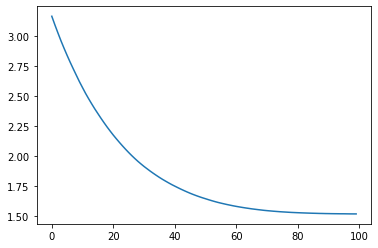

1000/1000 [==============================] - 0s 51us/sample - loss: 1.5191



 90%|█████████ | 18/20 [01:19<00:08,  4.39s/it]

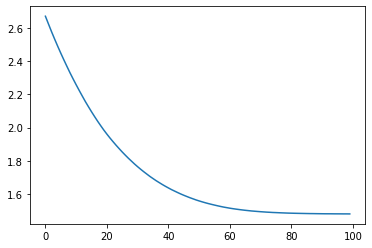

1000/1000 [==============================] - 0s 54us/sample - loss: 1.4786



 95%|█████████▌| 19/20 [01:23<00:04,  4.43s/it]

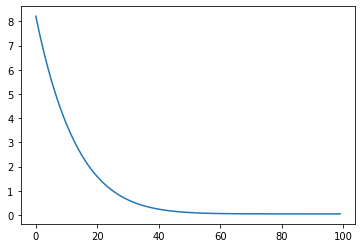

1000/1000 [==============================] - 0s 51us/sample - loss: 0.0432



100%|██████████| 20/20 [01:28<00:00,  4.41s/it]


In [201]:
res = [train_pruned(s) for s in tqdm(z)]

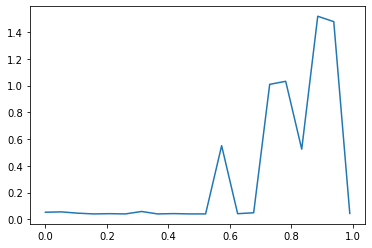

In [202]:
plt.plot(z, np.array(res)[:,1])

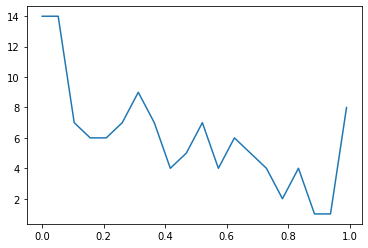

In [203]:
plt.plot(z, np.array(res)[:,0])

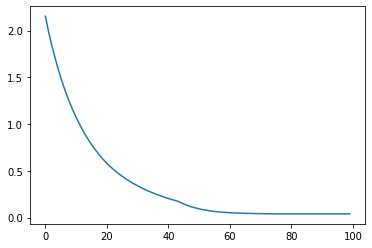

1000/1000 [==============================] - 0s 50us/sample - loss: 0.0398


(6, 0.03979722607135773)

In [207]:
train_pruned(0.4)